# Imports

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Functions

In [19]:
def data_sorting(folder_name):
    
    for i, data_dir in enumerate(os.listdir(os.path.join('data', folder_name))):

        data1 = pd.read_csv(os.path.join('data', folder_name, data_dir), header = None)
        data1.columns = ['gen', 'log']

        data1['fitness'] = data1.log.apply(lambda x: float(x.split(',')[0].replace('[', '')))
        data1['age'] = data1.log.apply(lambda x: float(x.split(',')[1]))
        data1['score'] = data1.log.apply(lambda x: float(x.split(',')[2].replace(']', '')))

        data1.drop(columns = ['log'], inplace = True)

        if i == 0:

            data = data1.copy()

        else:

            data['fitness'] += data1['fitness']
            data['age'] += data1['age']
            data['score'] += data1['score']

    data['fitness'] = data['fitness'] / i 
    data['age'] = data['age'] / i
    data['score'] = data['score'] / i

    data.set_index('gen', inplace = True)
    
    return data

In [13]:
def plot_features(data):
    
    plt.plot(data.index, data.score)
    plt.title('Avg Score over the generations')
    plt.xlabel('Generation')
    plt.ylabel('Avg Score')
    plt.show()
    
    plt.plot(data.index, data.score)
    plt.title('Avg Age over the generations')
    plt.xlabel('Generation')
    plt.ylabel('Avg Score')
    plt.show()
    
    plt.plot(data.index, data.fitness)
    plt.title('Avg Fitness over the generations')
    plt.xlabel('Generation')
    plt.ylabel('Avg Fitness')
    plt.show()

In [14]:
def compare_data(folder_list):
    
    data_dict = {}
    
    for folder in folder_list:
        
        data_dict[folder.split('.')[0]] = data_sorting(folder)
    
    for data_label in data_dict.keys():
        
        plt.plot(data_dict[data_label].index, data_dict[data_label].score, label = data_label)
        plt.title('Avg Score over the generations')
        plt.xlabel('Generation')
        plt.ylabel('Avg Score')
    
    plt.legend(loc = 4) 
    plt.show()
    
    for data_label in data_dict.keys():
        
        plt.plot(data_dict[data_label].index, data_dict[data_label].age, label = data_label)
        plt.title('Avg Age over the generations')
        plt.xlabel('Generation')
        plt.ylabel('Avg Age')
    
    plt.legend(loc = 4) 
    plt.show()
    
    for data_label in data_dict.keys():
        
        plt.plot(data_dict[data_label].index, data_dict[data_label].fitness, label = data_label)
        plt.title('Avg Fitness over the generations (not comparable if the fitness function is different)')
        plt.xlabel('Generation')
        plt.ylabel('Avg Fitness')
   
    plt.legend(loc = 4) 
    plt.show()
    

# See performance of a configuration

Insert the name of the directory where the log files are stored

In [15]:
name = 'fit_funct_davide'

In [16]:
data = data_sorting(name)

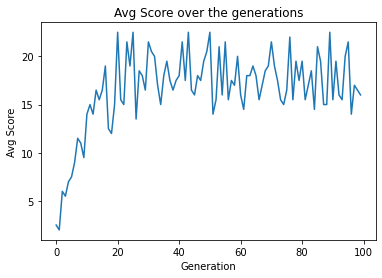

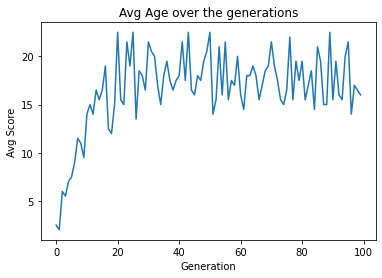

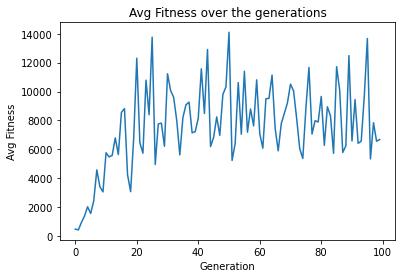

In [17]:
plot_features(data)

# Compare two configurations

The input of the function needs to be a list with the names of the folders where the logs are stored. 

In [20]:
compare_data(['fit_funct_davide', 'gp_davide'])

AttributeError: 'float' object has no attribute 'split'